<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/9_1_%ED%95%84%EC%82%AC_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[개념 정리]**

##**[선형회귀]**
- 입력 특성의 가중치 합과 편향 이라는 상수를 더해 예측을 만듦

- RMSE를 최소화하는 세타를 찾아야 함

##**[정규방정식]**
- 비용 함수를 최소화하는 세타값을 찾기 위한 해석적인 방법

- inv(): 역행렬 계산

- dot(): 행렬 곱셈

- 유사역행렬은 SVD 기법으로 계산

##**[계산 복잡도]**
- 역행렬 계산

##**[경사 하강법]**
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

##**[확률적 경사 하강법]**
- 한 개의 샘플 무작위 선택 > 이에 대한 그레이디언트 계산함

- 담금질 기법 알고리즘과 유사

#**[코드 필사]**

In [ ]:
import numpy as np
x= 2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)

In [ ]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [ ]:
theta_best

array([[4.32198718],
       [2.8172599 ]])

In [ ]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[4.32198718],
       [9.95650698]])

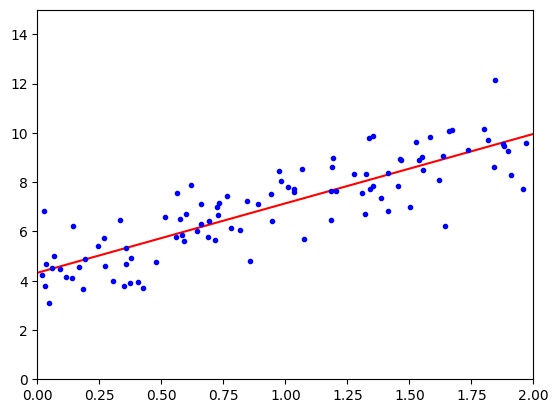

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, "r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.32198718]), array([[2.8172599]]))

In [ ]:
lin_reg.predict(x_new)

array([[4.32198718],
       [9.95650698]])

In [ ]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.32198718],
       [2.8172599 ]])

In [ ]:
np.linalg.pinv(x_b).dot(y)

array([[4.32198718],
       [2.8172599 ]])

In [ ]:
eta=0.1
n_iterations=10000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients

In [ ]:
theta

array([[4.32198718],
       [2.8172599 ]])

In [ ]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/ (t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index: random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients


In [ ]:
theta

array([[4.31256245],
       [2.75533652]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=10000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, max_iter=10000, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.3100304]), array([2.80389071]))

In [ ]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([-1.52313198])

In [ ]:
x_poly[0]

array([-1.52313198,  2.31993104])

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.76265679]), array([[1.02253012, 0.52250688]]))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
    train_errors, val_errors=[],[]
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_val_predict=model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

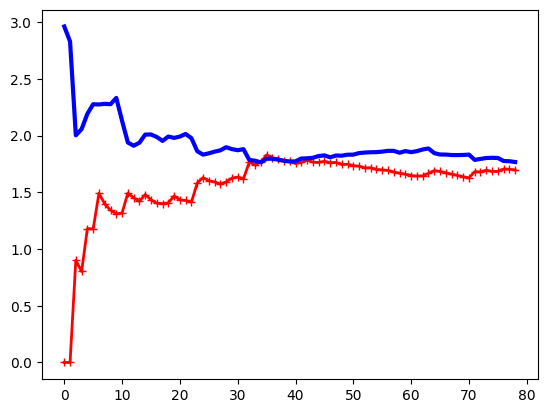

In [ ]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

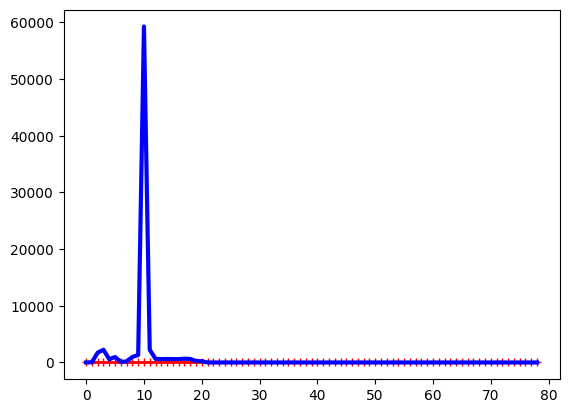

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression,x,y)